# The numbers behind Formula One champions

On this notebook, I will analise several statistics of Formula One's most succesfull drivers. The covered topics will be:
* The top 10 drivers with the most wins, and the highest win %
* How the definition of a successfull driver changed over the years
* The influence the team has over a driver's success
* Longest streaks

For this analysis, I will be using ergast's database. More info about it can be found at http://ergast.com/mrd/

In [1]:
# Standart imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import requests


Bad key "text.kerning_factor" on line 4 in
C:\Users\Leonardo\Documents\Python\Research-Projects\research-env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


## Top 10 "best" drivers

In this section, we analyze the 10 drivers who won the most.

First, let's use the api to see which seasons it has data of.

In [22]:
response = requests.get(url="http://ergast.com/api/f1/seasons.json?limit=73&offset=0")
data = response.json()
list_of_seasons = []
for season in data["MRData"]["SeasonTable"]["Seasons"]:
    list_of_seasons.append(season["season"])
print(len(list_of_seasons))

73


F1's first season was back in 1950. So the database used has all seasons logged.

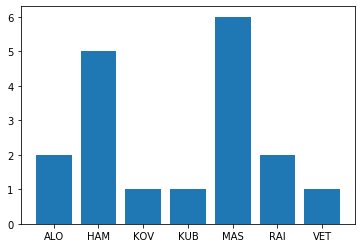

In [50]:
response = requests.get(url="http://ergast.com/api/f1/2008/results/1.json")
data = response.json()
winners_2008 = []
for race in data["MRData"]["RaceTable"]["Races"]:
    winners_2008.append(race["Results"][0]["Driver"]["code"])

drivers, nmbr_wins = np.unique(winners_2008, return_counts=True)
plt.bar(x=drivers, height=nmbr_wins, align="center");

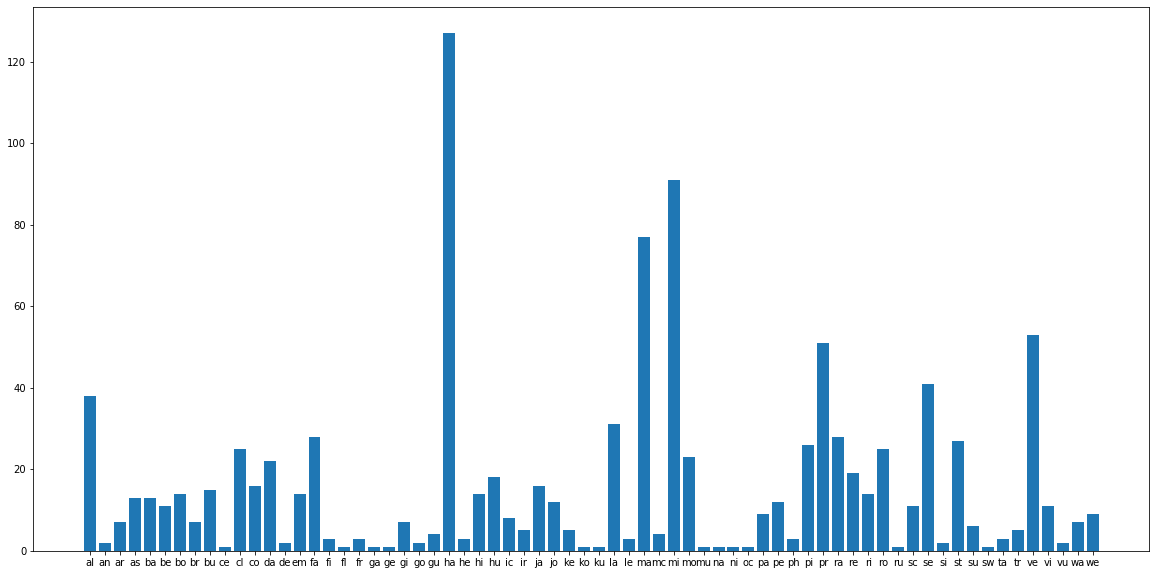

In [62]:
year = 1950
winners = []
for i in range(73):
    response = requests.get(url=f"http://ergast.com/api/f1/{year+i}/results/1.json")
    data = response.json()
    for race in data["MRData"]["RaceTable"]["Races"]:
        winners.append(race["Results"][0]["Driver"]["driverId"][:2])
plt.subplots(figsize=(20,10))
drivers, nmbr_wins = np.unique(winners, return_counts=True)
plt.bar(x=drivers, height=nmbr_wins, align="center");

In [57]:
winners

['leclerc', 'max_verstappen']